# <span style="color:orange">Clustering sur les données du Baromètre lorrain de la Science Ouverte</span>

Le clustering, ou partitionnement des données, est une méthode d'analyse permettant de rassembler des données dans des "paquets", afin d'identifier des relations, des tendances. Ici, l'objectif est de voir s'il existe une corrélation entre le nombre de publications et leur taux d'accès ouvert, ou encore une corrélation entre accès ouvert et discipline.

In [1]:
# Importer les librairies nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importer le jeu de données avec lequel on souhaite travailler (changer la partie "lorraine" en fonction de l'établissement) :

In [2]:
publis_lorraine_df = pd.read_csv("Data/outputs/publis_lorraine_completes.csv")

Restreindre à l'année souhaitée (modifier l'année pour les mises à jour) :

In [3]:
publications_2019 = publis_lorraine_df.loc[publis_lorraine_df['published_year'] == 2019.0,:]

Créer une DataFrame avec deux informations : le nombre de publications dans l'année en fonction de la discipline, et le nombre de publications en accès ouvert dans ces mêmes disciplines.

In [4]:
publications_par_domaine = publications_2019['scientific_field'].value_counts().sort_index()
publications_par_domaine = publications_par_domaine.to_frame()

In [5]:
publications_en_oa = publications_2019.loc[publications_2019['is_oa']==True,:]
publications_en_oa = publications_en_oa['scientific_field'].value_counts().sort_index()
publications_en_oa = publications_en_oa.to_frame()
publications_en_oa

scientific_field
Biology (fond.)                                            333
Chemistry                                                  162
Computer and \n information sciences                       274
Earth, Ecology, \nEnergy and applied biology               241
Engineering                                                 98
Humanities                                                  76
Mathematics                                                130
Medical research                                           455
Physical sciences, Astronomy                               376
Social sciences                                             82
unknown                                                      1

In [6]:
publis_triees = pd.merge(publications_par_domaine, publications_en_oa, left_index = True, right_index = True)
publis_triees = publis_triees.rename(columns = {'scientific_field_x': 'Nombre total de publications', 'scientific_field_y': 'Nb de publications en accès ouvert'})
publis_triees = publis_triees.rename_axis('Disciplines')
# Ajout d'une colonne pour l'affichage des disciplines dans le graphique
publis_triees["Disciplines"] = publications_en_oa.index
# Ajout d'une colonne avec le calcul des pourcentages d'accès ouvert
publis_triees["Pourcentage d'accès ouvert"] = ((publis_triees["Nb de publications en accès ouvert"] * 100) / publis_triees["Nombre total de publications"])
# N'afficher que la première décimale pour la colonne des pourcentages
pd.set_option('precision', 1)
# Supprimer les lignes où la discipline est inconnue
indexNames = publis_triees[publis_triees['Disciplines'] == 'unknown' ].index
publis_triees.drop(indexNames , inplace=True)
publis_triees

Nombre total de publications  \
Disciplines                                                                  
Biology (fond.)                                                        566   
Chemistry                                                              375   
Computer and \n information sciences                                   491   
Earth, Ecology, \nEnergy and applied biology                           447   
Engineering                                                            215   
Humanities                                                             140   
Mathematics                                                            176   
Medical research                                                       985   
Physical sciences, Astronomy                                           661   
Social sciences                                                        153   

                                              Nb de publications en accès ouvert  \
Disciplines                                                                        
Biology (fond.)                                                              333   
Chemistry                                                                    162   
Computer and \n information sciences                                         274   
Earth, Ecology, \nEnergy and applied biology                                 241   
Engineering                                                                   98   
Humanities                                                                    76   
Mathematics                                                                  130   
Medical research                                                             455   
Physical sciences, Astronomy                                                 376   
Social sciences                                                               82   

                                                                               Disciplines  \
Disciplines                                                                                  
Biology (fond.)                                                            Biology (fond.)   
Chemistry                                                                        Chemistry   
Computer and \n information sciences                  Computer and \n information sciences   
Earth, Ecology, \nEnergy and applied biology  Earth, Ecology, \nEnergy and applied biology   
Engineering                                                                    Engineering   
Humanities                                                                      Humanities   
Mathematics                                                                    Mathematics   
Medical research                                                          Medical research   
Physical sciences, Astronomy                                  Physical sciences, Astronomy   
Social sciences                                                            Social sciences   

                                              Pourcentage d'accès ouvert  
Disciplines                                                               
Biology (fond.)                                                     58.8  
Chemistry                                                           43.2  
Computer and \n information sciences                                55.8  
Earth, Ecology, \nEnergy and applied biology                        53.9  
Engineering                                                         45.6  
Humanities                                                          54.3  
Mathematics                                                         73.9  
Medical research                                                    46.2  
Physical sciences, Astronomy                                        56.9  
Social sciences                                                     53.6

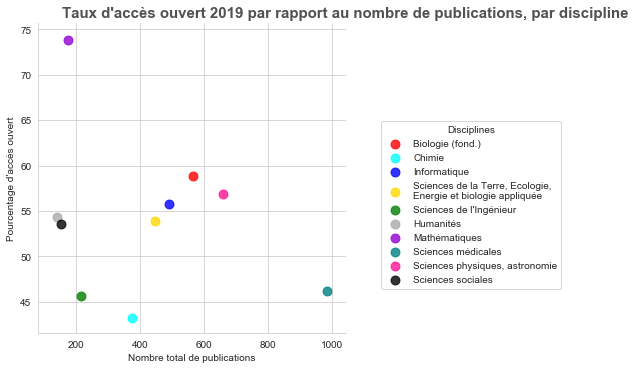

In [13]:
sns.set_style("whitegrid")

facet = sns.lmplot(data=publis_triees, x='Nombre total de publications', y="Pourcentage d'accès ouvert", hue='Disciplines',
                   fit_reg=False, legend=False, legend_out=False, palette=['red','aqua', 'blue', 'gold', 'green',
                                                                        'darkgray', 'darkviolet', 'teal', 'deeppink', 'black', 'white'],
                  scatter_kws={"s": 80})

plt.title("Taux d'accès ouvert 2019 par rapport au nombre de publications, par discipline", fontsize = 15, x = 1, y = 2,
          fontweight = 'bold', alpha = 0.8)

plt.legend(title='Disciplines', loc='best', labels=['Biologie (fond.)', 'Chimie', 
                                         'Informatique',
                                       'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        "Sciences de l'Ingénieur",
                                        'Humanités',
                                        'Mathématiques',
                                        'Sciences médicales',
                                        'Sciences physiques, astronomie',
                                       'Sciences sociales'], bbox_to_anchor=(1.1, 0.7))

plt.savefig('Data/outputs/2019_rapport_oa_nb_publications.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

Répéter l'opération pour le graphique par éditeurs. Modifier l'année pour les mises à jour.

In [8]:
publications_par_editeur = publications_2019['publisher'].value_counts().sort_index()
publications_par_editeur = publications_par_editeur.to_frame()

In [9]:
publications_en_oa_ed = publications_2019.loc[publications_2019['is_oa']==True,:]
publications_en_oa_ed = publications_en_oa_ed['publisher'].value_counts().sort_index()
publications_en_oa_ed = publications_en_oa_ed.to_frame()

In [10]:
publis_triees_ed = pd.merge(publications_par_editeur, publications_en_oa_ed, left_index = True, right_index = True)
publis_triees_ed = publis_triees_ed.rename(columns = {'publisher_x': 'Nombre total de publications', 'publisher_y': 'Nb de publications en accès ouvert'})
publis_triees_ed = publis_triees_ed.rename_axis('Editeurs')
publis_triees_ed["Editeurs"] = publications_en_oa_ed.index
publis_triees_ed = publis_triees_ed.sort_values(by=['Nombre total de publications'], ascending=False)
# Limiter le nombre d'éditeurs affichés aux 3 premiers. Ce chiffre peut être modulé comme on le souhaite mais attention, le graphique doit rester lisible
publis_triees_ed = publis_triees_ed[0:10]
publis_triees_ed["Pourcentage d'accès ouvert"] = ((publis_triees_ed["Nb de publications en accès ouvert"] * 100) / publis_triees_ed["Nombre total de publications"])
# N'afficher que la première décimale pour la colonne des pourcentages
pd.set_option('precision', 1)
publis_triees_ed

Nombre total de publications  \
Editeurs                                                                
Elsevier BV                                                      1227   
Springer Science and Business Media LLC                           470   
Wiley                                                             303   
Springer International Publishing                                 171   
IEEE                                                              150   
MDPI AG                                                           146   
Informa UK Limited                                                113   
IOP Publishing                                                    105   
American Chemical Society (ACS)                                   101   
Oxford University Press (OUP)                                      91   

                                         Nb de publications en accès ouvert  \
Editeurs                                                                      
Elsevier BV                                                             468   
Springer Science and Business Media LLC                                 272   
Wiley                                                                   158   
Springer International Publishing                                        83   
IEEE                                                                     50   
MDPI AG                                                                 146   
Informa UK Limited                                                       27   
IOP Publishing                                                           82   
American Chemical Society (ACS)                                          48   
Oxford University Press (OUP)                                            49   

                                                                        Editeurs  \
Editeurs                                                                           
Elsevier BV                                                          Elsevier BV   
Springer Science and Business Media LLC  Springer Science and Business Media LLC   
Wiley                                                                      Wiley   
Springer International Publishing              Springer International Publishing   
IEEE                                                                        IEEE   
MDPI AG                                                                  MDPI AG   
Informa UK Limited                                            Informa UK Limited   
IOP Publishing                                                    IOP Publishing   
American Chemical Society (ACS)                  American Chemical Society (ACS)   
Oxford University Press (OUP)                      Oxford University Press (OUP)   

                                         Pourcentage d'accès ouvert  
Editeurs                                                             
Elsevier BV                                                    38.1  
Springer Science and Business Media LLC                        57.9  
Wiley                                                          52.1  
Springer International Publishing                              48.5  
IEEE                                                           33.3  
MDPI AG                                                       100.0  
Informa UK Limited                                             23.9  
IOP Publishing                                                 78.1  
American Chemical Society (ACS)                                47.5  
Oxford University Press (OUP)                                  53.8

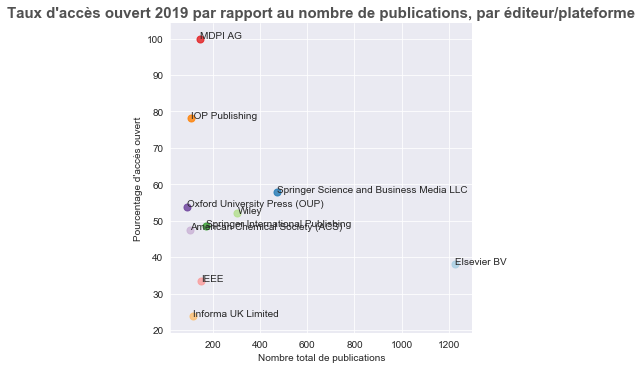

In [12]:
sns.set_style("darkgrid")

facet = sns.lmplot(data=publis_triees_ed, x='Nombre total de publications', y="Pourcentage d'accès ouvert", hue='Editeurs',
                   fit_reg=False, legend=False, scatter_kws={"s": 50}, palette= 'Paired')

plt.title("Taux d'accès ouvert 2019 par rapport au nombre de publications, par éditeur/plateforme", fontsize = 15, x = 0.5, y = 1,
          fontweight = 'bold', alpha = 0.8)

for ax in facet.axes.ravel():
    for t, x, y in publis_triees_ed[["Editeurs","Nombre total de publications","Pourcentage d'accès ouvert"]].values.tolist():
        ax.annotate(t, (x, y))

plt.savefig('Data/outputs/2019_rapport_oa_nb_publications_editeurs.png', dpi=100, bbox_inches='tight', pad_inches=0.9)